<a href="https://colab.research.google.com/github/molofsky/Center-Alignment-Paste/blob/main/notebooks/Center_Alignment_Paste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup

In [1]:
!pip install -U -q PyDrive
!pip install scanpy
!pip install paste-bio
!pip install POT

Authenticating Google Drive to download files

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
id = '1Emm9eRKYAdc1kwpI4_RWqJAsXwY5BnLK'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice1_coords.csv')

id = '1uQ3OcOvgznBd0-YAyFM5IMm-9Atb0PMX'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice1.h5')

id = '1Tix0CRW20diWZ9Y3Q4TvUa86CvUY6Gui'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice2_coords.csv')

id = '12FJ8ph0MN4sNWqQQe1G4vrZNi05mf6Fx'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice2.h5')

id = '1MQt_AyKssgWpXV64vYtQLO5SlYDUilSu'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice3_coords.csv')

id = '1AQqbuLcfHc3hwsTrDVPyH_5Bdfsb9Z_b'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice3.h5')

id = '1-zQsQbP0GXol0RuICGHp3tiaLQkfSFy-'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice4_coords.csv')

id = '1iAEX8wrO49KldN1Zct928vHSEDeX2gzm'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice4.h5')

id = '19J4fxCvPaotiFS6mMBPW48pYsDS937sL'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice5_coords.csv')

id = '1VyzyoWBud-SIeleRKO99eFJMKs0koomI'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice5.h5')

id = '1aVUdgL9arv4eVBCGFkpA7kRJMFKWQzqn'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice6_coords.csv')

id = '1JBJkwZuB8ZAWJSyTaNinm6b5zCJoDeqg'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice6.h5')

id = '1hEoMbe9Y04iotGCOFCJavC7Vg6qmTis0'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice7_coords.csv')

id = '1j63oSsO5_crm2u75E_lKcXA_xq8ItwsE'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice7.h5')

id = '1xZgN6rFVm80lLeKhN0zS0K3idUKBarVH'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice8_coords.csv')

id = '1LKZcCaZylxkEDzJCoijrty4JqreUKzW5'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice8.h5')

Imports

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import paste as pst
import seaborn as sns

### Center Alignment

Read data

In [5]:
slice_names = ["slice1", "slice2", "slice3", "slice4", "slice5", "slice6", "slice7", "slice8"]

def load_slices():
  slices = []
  for name in slice_names:
    adata_slice = sc.read_10x_h5(name + ".h5")
    coords_slice = np.genfromtxt(name + "_coords.csv", usecols=(2,3), delimiter=',', skip_header=1)
    adata_slice.obsm['spatial'] = coords_slice
    # preprocess data
    sc.pp.filter_genes(adata_slice, min_counts = 15)
    sc.pp.filter_cells(adata_slice, min_counts = 100)
    slices.append(adata_slice)
  return slices

Center align slices

In [6]:
slices = load_slices()

slice1, slice2, slice3, slice4, slice5, slice6, slice7, slice8 = slices

init_slice = slice5.copy()

slices = list((slice1, slice2, slice3, slice4, slice5, slice6, slice7, slice8))

lmbda = len(slices)*[1/len(slices)]

center_slice, pis = pst.center_align(init_slice, slices, lmbda)

Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Filtered all slices for common genes. There are 13733 common genes.
Iteration: 0
Solving Pairwise Slice Alignment Problem.
Solving Center Mapping NMF Problem.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Objective  -1263.3505450327468
Difference: 1263.3505450327468

Iteration: 1
Solving Pairwise Slice Alignment Problem.
Solving Center Mapping NMF Problem.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Objective  6.058621517339105
Difference: 1269.409166550086

Iteration: 2
Solving Pairwise Slice Alignment Problem.
Solving Center Mapping NMF Problem.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Objective  6.13170291383869
Difference: 0.07308139649958445

Iteration: 3
Solving Pairwise Slice Alignment Problem.
Solving Center Mapping NMF Problem.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Objective  6.13309243988893
Difference: 0.0013895260502403417

Iteration: 4
Solving Pairwise Slice Alignment Problem.
Solving Center Mapping NMF Problem.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Objective  6.1329470375658675
Difference: 0.0001454023230627044



Matrix embeddings

In [7]:
W = center_slice.uns['paste_W']
H = center_slice.uns['paste_H']

K-means clustering on W embedding

In [26]:
from sklearn.cluster import KMeans

X = (W.T/W.sum(axis=1)).T
X += 1
X = np.log(X)

kmeans = KMeans(n_clusters = 5, random_state = 0).fit(X) # arbitrary params
print(kmeans.labels_)

[3 0 3 ... 2 3 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Plotting matrix embeddings

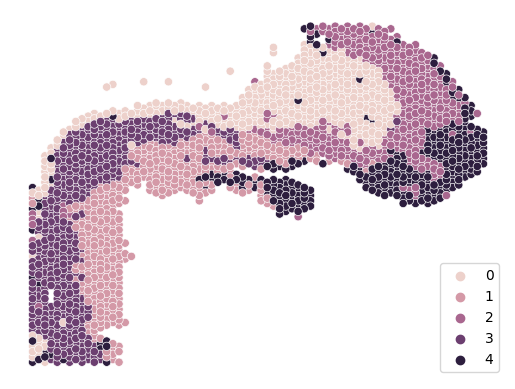

In [48]:
x = center_slice.obsm['spatial'][:, 0]
y = center_slice.obsm['spatial'][:, 1]
sns.scatterplot(x=x, y=y, hue=kmeans.labels_).set(xticks=[], yticks=[])
sns.despine(left=True, bottom=True)